In [1]:
import igraph as ig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

from tqdm import trange, tqdm

from collections import defaultdict, Counter
from itertools import combinations

In [2]:
def read_snap(edge_file, com_file, prefix=""):
    edges = pd.read_csv(prefix+edge_file, sep='\t', comment="#")
    coms = []
    with open(prefix+com_file, "r") as infile:
        for line in infile:
            x = line[:-1]  # drop trailing newline
            x = x.split('\t')
            coms.append(frozenset([int(y) for y in x])) ## map to 0-based

    g = ig.Graph.DataFrame(edges, directed=False)

    c = [set() for _ in range(g.vcount())]
    for i, com in enumerate(coms):
        for v in com:
            c[v].add(i)
    c = [frozenset(i) for i in c] 
    g.vs["comms"] = c

    # Vertex list is not continugous, drop degree 0 vertices
    g = g.subgraph(np.arange(g.vcount())[np.array(g.degree()) > 0])  

    # Drop some vars to free up memory
    del edges

    return g, coms


def read_abcdoo_coms(com_file, prefix=""):
    ## read communities
    file = prefix+com_file
    c = []
    with open(file, "r") as infile:
        for line in infile:
            x = line.split('\t')
            c.append([int(y)-1 for y in x[1].rstrip()[1:-1].split(',')]) ## map to 0-based

    coms = defaultdict(set)
    for i, com in enumerate(c):
        for c in com:
            coms[c].add(i)
    coms.pop(0)
    coms = list(coms.values())

    return coms

In [3]:
## DBLP graph
dblp_g, dblp_coms = read_snap("com-dblp.ungraph.txt", "com-dblp.all.cmty.txt", "../../SNAP/")
abcdoo_d2_coms = read_abcdoo_coms("abcdoo_dblp_d2_com.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d5_coms = read_abcdoo_coms("abcdoo_dblp_d5_com.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d10_coms = read_abcdoo_coms("abcdoo_dblp_d10_com.dat", "../../ABCDGraphGenerator.jl/utils/")

print(f"DBLP has {dblp_g.vcount()} vertices.")
print(f"DBLP has {dblp_g.ecount()} edges.")
print(f"DBLP has {len(dblp_coms)} communities.")
print(f"ABCDOO d2 has {len(abcdoo_d2_coms)} communities.")
print(f"ABCDOO d5 has {len(abcdoo_d2_coms)} communities.")
print(f"ABCDOO d10 has {len(abcdoo_d2_coms)} communities.")

DBLP has 317080 vertices.
DBLP has 1049865 edges.
DBLP has 13477 communities.
ABCDOO d2 has 4952 communities.
ABCDOO d5 has 4952 communities.
ABCDOO d10 has 4952 communities.


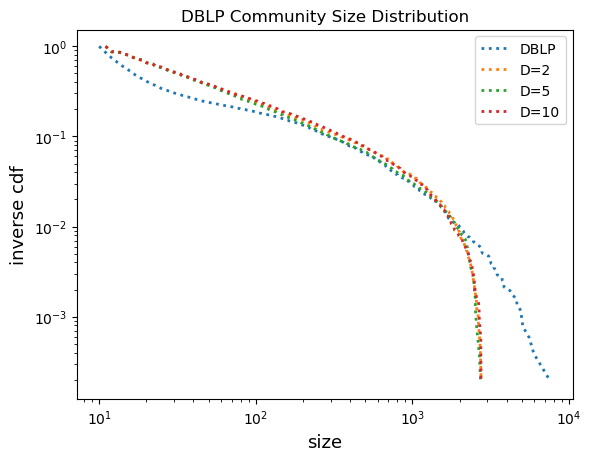

In [4]:
fig, ax = plt.subplots()

options = [dblp_coms, abcdoo_d2_coms, abcdoo_d5_coms, abcdoo_d10_coms]
names = ["DBLP", "D=2", "D=5", "D=10"]
for coms, name in zip(options, names):
    X = powerlaw.Fit([len(x) for x in coms], xmin=10)
    #X.power_law.plot_ccdf(ax=ax, linestyle="-", label=name)
    X.plot_ccdf(ax=ax, linewidth=2, original_data=False, linestyle=":", label=name)

ax.set_title("DBLP Community Size Distribution")
ax.legend()
ax.set_xlabel("size", fontsize=13)
ax.set_ylabel("inverse cdf", fontsize=13);



Amazon has 334863 vertices.
Amazon has 925871 edges.
Amazon has 75149 communities.
ABCDOO d2 has 16649 communities.
ABCDOO d5 has 16649 communities.
ABCDOO d10 has 16649 communities.


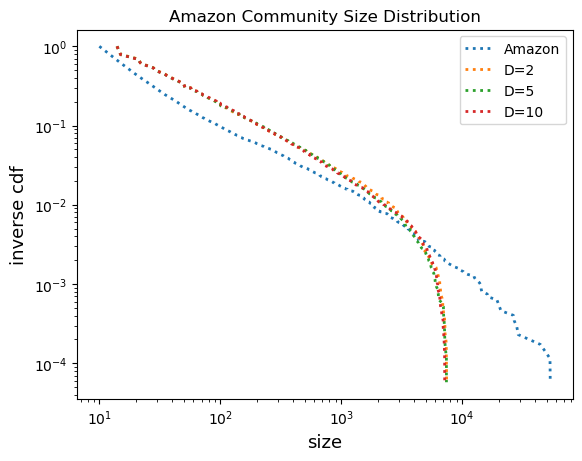

In [5]:
## DBLP graph
amazon_g, amazon_coms = read_snap("com-amazon.ungraph.txt", "com-amazon.all.dedup.cmty.txt", "../../SNAP/")
abcdoo_d2_coms = read_abcdoo_coms("abcdoo_amazon_d2_com.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d5_coms = read_abcdoo_coms("abcdoo_amazon_d5_com.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d10_coms = read_abcdoo_coms("abcdoo_amazon_d10_com.dat", "../../ABCDGraphGenerator.jl/utils/")

print(f"Amazon has {amazon_g.vcount()} vertices.")
print(f"Amazon has {amazon_g.ecount()} edges.")
print(f"Amazon has {len(amazon_coms)} communities.")
print(f"ABCDOO d2 has {len(abcdoo_d2_coms)} communities.")
print(f"ABCDOO d5 has {len(abcdoo_d2_coms)} communities.")
print(f"ABCDOO d10 has {len(abcdoo_d2_coms)} communities.")

fig, ax = plt.subplots()

options = [amazon_coms, abcdoo_d2_coms, abcdoo_d5_coms, abcdoo_d10_coms]
names = ["Amazon", "D=2", "D=5", "D=10"]
for coms, name in zip(options, names):
    X = powerlaw.Fit([len(x) for x in coms], xmin=10)
    #X.power_law.plot_ccdf(ax=ax, linestyle="-", label=name)
    X.plot_ccdf(ax=ax, linewidth=2, original_data=False, linestyle=":", label=name)

ax.set_title("Amazon Community Size Distribution")
ax.legend()
ax.set_xlabel("size", fontsize=13)
ax.set_ylabel("inverse cdf", fontsize=13);